In [13]:
import pandas as pd
df = pd.read_csv('/content/ds_salaries.csv')
df.info()
df.head()
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
0


index(unnamed), experience_level, employment_type, job_title, salary_currency, employee_residence, company_location and company_size - qualitative
others - quantitative

In [11]:
df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)]
print(df.describe())
print(df.info())


            index    work_year         salary  salary_in_usd  remote_ratio
count  561.000000   561.000000     561.000000     561.000000    561.000000
mean   312.680927  2021.447415  112440.358289  111965.424242     71.568627
std    174.034643     0.679678   58419.459966   56881.438715     40.730377
min      0.000000  2020.000000    4000.000000    2859.000000      0.000000
25%    163.000000  2021.000000   65000.000000   69336.000000     50.000000
50%    319.000000  2022.000000  108000.000000  105000.000000    100.000000
75%    462.000000  2022.000000  150075.000000  150000.000000    100.000000
max    606.000000  2022.000000  276000.000000  276000.000000    100.000000
<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               561 non-null    int64 
 1   work_year           561 non-null    int64 
 2   experience_level    561 non-

In [15]:
mean_salary = df.groupby('experience_level')['salary'].mean()
median_salary = df.groupby('experience_level')['salary'].median()

mean_salary, median_salary

(experience_level
 EN    264622.454545
 EX    427072.115385
 MI    480617.690141
 SE    213949.353571
 Name: salary, dtype: float64,
 experience_level
 EN     68500.0
 EX    187500.0
 MI     85000.0
 SE    140000.0
 Name: salary, dtype: float64)

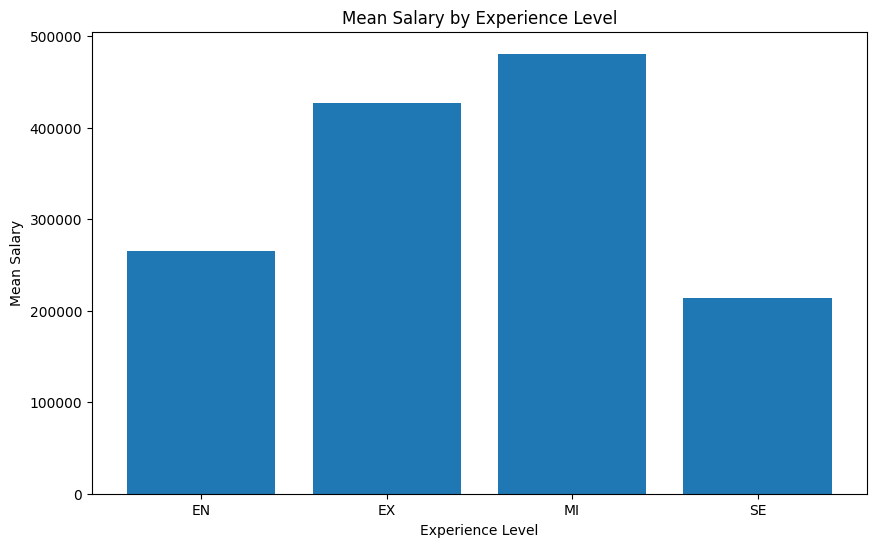

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(mean_salary.index, mean_salary.values)
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Experience Level')
plt.show()